## Story of this study

<b>General Basic Info</b><br>
In a neural network neuron we have inputs, weights, transfer function(s) with bias value, hidden layers(not everytimes) and activation functions. We create a neural network model and it creates best equation(with weights and bias values) with <b> Gradient Descent Method</b> and <b>back propagation system</b> inside it. Then with activation function it normalizes our values to generally(depends on type of activation function) 0-1 interval. 
And we compare the results of output equations, and according to results we can assume the best result percent as true result.

<b>In this basic study</b><br>
We will convert our image to input (one dimensional numerical array) and give to created model, then predict to result which image is which digit number. And number of output layers will be 10 because we have 10 digit number in this example

In [30]:
import cv2
import numpy as np,matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

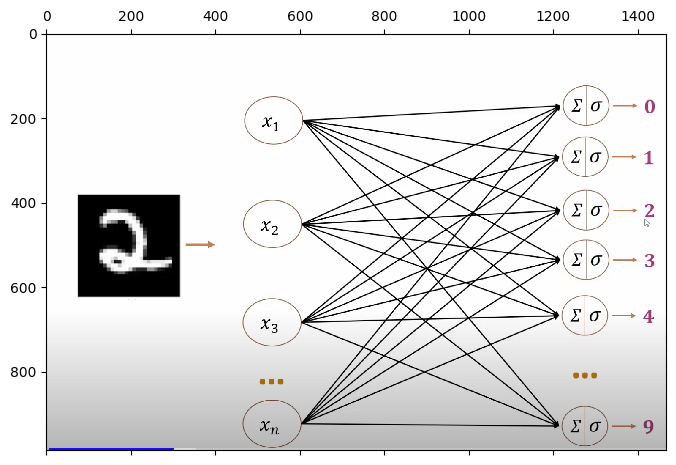

In [14]:
image = cv2.imread('Images/image1.jpg')
plt.figure(figsize=(8,6))
plt.matshow(image,fignum=1)

## Getting training and test images

In [69]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [46]:
type(x_train)

numpy.ndarray

In [22]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
x_train.shape

(60000, 28, 28)

<b>So we have 60000 train data. That is pretty good number. And all of our image example consist of 28x28 pixels.
Let's see the one of training image

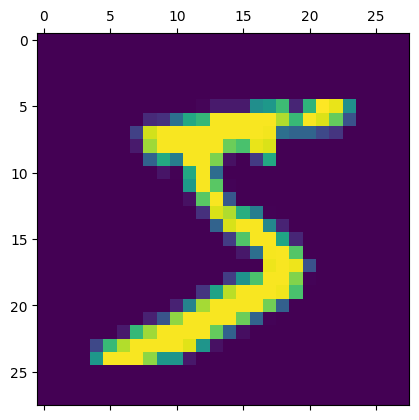

In [21]:
plt.matshow(x_train[0]);

<b>Now as we see in image below, we will convert our image to one dimensional numerical value list to be able to give to our neurons as input(we will 784 neuron input because our image has 28x28 pixels. as nparray)

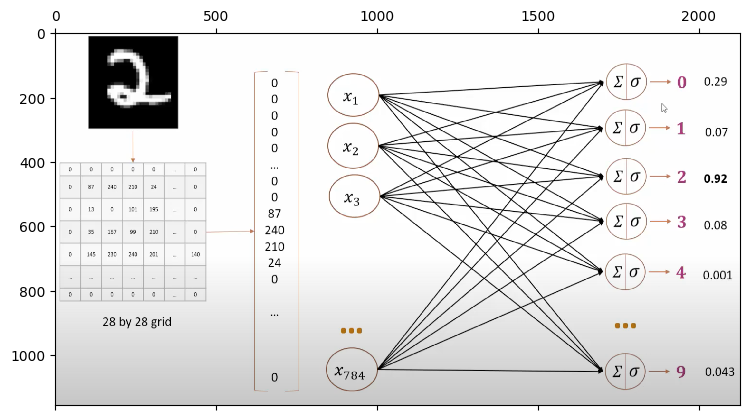

In [24]:
plt.matshow(cv2.imread("Images/image2.jpg"));

In [70]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

<b> So now it is one dimensional array with 784 element

In [64]:
# Creating model without any hidden layer

In [63]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.2968 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1055 - accuracy: 0.8795
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7175 - accuracy: 0.8838
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6018 - accuracy: 0.8831
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3552 - accuracy: 0.8884


# Model Tuning

In [71]:
# 1- all models like scaling because it make easier learning process
#We can make it with /255 or directly a function from sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_training_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [76]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_training_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2782 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1294 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [77]:
#As we see the result is much better. And lets see the test results, accurancy metricses

In [79]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9749


[0.081942118704319, 0.9749000072479248]

In [80]:
#result is perfect. loss is close to 0 and binary accuracy is very good.
#let see the result with visualization

In [87]:
x_test = x_test.reshape(len(x_test),28,28)

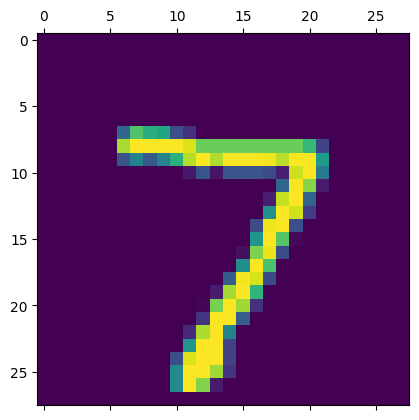

In [89]:
plt.matshow(x_test[0]);

In [92]:
results = model.predict(x_test_scaled)

313/313 [==============================] - 0s 938us/step


In [93]:
results[0]

array([7.1356739e-03, 2.6898152e-07, 1.7052203e-02, 7.3161733e-01,
       4.8704391e-07, 3.6568099e-04, 5.9273480e-12, 9.9999958e-01,
       2.0736262e-02, 7.8851485e-01], dtype=float32)

In [94]:
np.argmax(results[0])

7

In [96]:
#As we see result is true! And lets see it with heatmap

In [99]:
y_predicted_labels = [np.argmax(i) for i in results]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

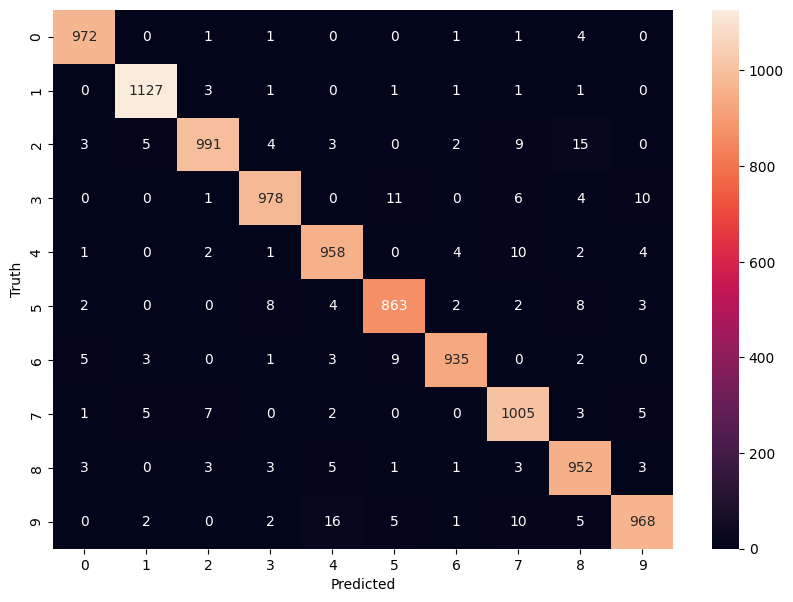

In [101]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [102]:
#for prediction of 0 value is 0 with %97.2 percentage.and others are almost the same